In [ ]:
#Run code to import the and codes, changed from mounting the drive to reading directly
from google.colab import drive
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
file_path = 'BullyingCombinedCleaned.xlsx'
df = pd.read_excel(file_path)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 737 entries, 0 to 736
Data columns (total 23 columns):
 #   Column                                            Non-Null Count  Dtype 
---  ------                                            --------------  ----- 
 0   record                                            737 non-null    int64 
 1   Bullied_on_school_property_in_past_12_months      737 non-null    object
 2   Bullied_not_on_school_property_in_past_12_months  737 non-null    object
 3   Cyber_bullied_in_past_12_months                   737 non-null    object
 4   Custom_Age                                        737 non-null    object
 5   Sex                                               737 non-null    object
 6   Physically_attacked                               733 non-null    object
 7   Physical_fighting                                 736 non-null    object
 8   Felt_lonely                                       737 non-null    object
 9   Close_friends                   

In [ ]:
from sklearn.preprocessing import LabelEncoder

# encode categorical variables
le = LabelEncoder()
df['Bullied_on_school_property_in_past_12_months'] = le.fit_transform(df['Bullied_on_school_property_in_past_12_months'])
df['Bullied_not_on_school_property_in_past_12_months'] = le.fit_transform(df['Bullied_not_on_school_property_in_past_12_months'])
df['Cyber_bullied_in_past_12_months'] = le.fit_transform(df['Cyber_bullied_in_past_12_months'])
df['Sex'] = le.fit_transform(df['Sex'])
df['Felt_lonely'] = le.fit_transform(df['Felt_lonely'])
df['Miss_school_no_permission'] = le.fit_transform(df['Miss_school_no_permission'])
df['Other_students_kind_and_helpful'] = le.fit_transform(df['Other_students_kind_and_helpful'])
df['Parents_understand_problems'] = le.fit_transform(df['Parents_understand_problems'])
df['Most_of_the_time_or_always_felt_lonely'] = le.fit_transform(df['Most_of_the_time_or_always_felt_lonely'])
df['Missed_classes_or_school_without_permission'] = le.fit_transform(df['Missed_classes_or_school_without_permission'])
df['Custom_Age'] = le.fit_transform(df['Custom_Age'])
df['Physically_attacked'] = le.fit_transform(df['Physically_attacked'])
df['Physical_fighting'] = le.fit_transform(df['Physical_fighting'])
df['Close_friends'] = le.fit_transform(df['Close_friends'])
df.head()

,record,Bullied_on_school_property_in_past_12_months,Bullied_not_on_school_property_in_past_12_months,Cyber_bullied_in_past_12_months,Custom_Age,Sex,Physically_attacked,Physical_fighting,Felt_lonely,Close_friends,...,Most_of_the_time_or_always_felt_lonely,Missed_classes_or_school_without_permission,Were_underweight,Were_overweight,Were_obese,anxiety_level,self_esteem,depression,bullying,stress_level
0,122,1,1,1,2,0,0,0,1,1,...,1,0,No,Yes,No,20,13,21,5,2
1,129,1,1,1,3,0,2,1,0,3,...,1,0,No,No,No,17,3,22,5,2
2,174,1,1,1,4,0,0,4,1,0,...,1,1,No,No,No,17,12,25,5,2
3,175,1,1,1,4,0,4,0,0,0,...,1,0,No,No,No,21,1,25,5,2
4,278,1,1,1,2,1,4,4,0,3,...,1,1,NaN,NaN,NaN,18,1,21,5,2


In [ ]:
#pre-processing before regression, normalize the values first due to it being categorical
from sklearn.preprocessing import normalize
target = df['bullying']
df.drop(['Were_underweight', 'Were_overweight', 'Were_obese'], axis=1, inplace=True)
#set column as predictor, then column as target
predictors = df[['stress_level','depression','Most_of_the_time_or_always_felt_lonely','Cyber_bullied_in_past_12_months','anxiety_level']]

In [ ]:
#Set the test and train split to 70/30 training/testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(predictors, target,
test_size=0.3, random_state=40)

In [ ]:
#Import Linier regression model, then fit it woth the training data.
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [ ]:
#Put test target and then predicts the target variable for the test set
y_pred = lr.predict(X_test)
_preds_df = pd.DataFrame(dict(observed=y_test, predicted=y_pred))
_preds_df.head()

,observed,predicted
385,3,3.213819
464,1,1.162973
335,3,2.999593
331,3,2.839675
333,3,2.960369


In [ ]:
#Prints the Measured Square Erorr and root mean squared error
from sklearn.metrics import mean_squared_error, r2_score
print("R2 Score:", r2_score(y_test, y_pred))
print('MSE: {}'.format(mean_squared_error(y_test, y_pred)))
print('RMSE: {}'.format(mean_squared_error(y_test, y_pred,squared=False)))

R2 Score: 0.9720693239772442
MSE: 0.05140969511509304
RMSE: 0.22673706162666268


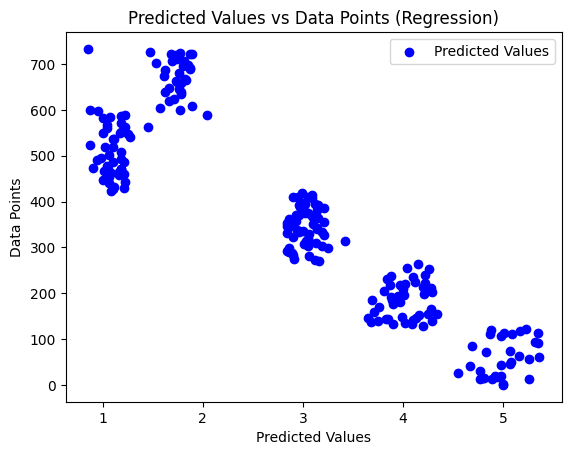

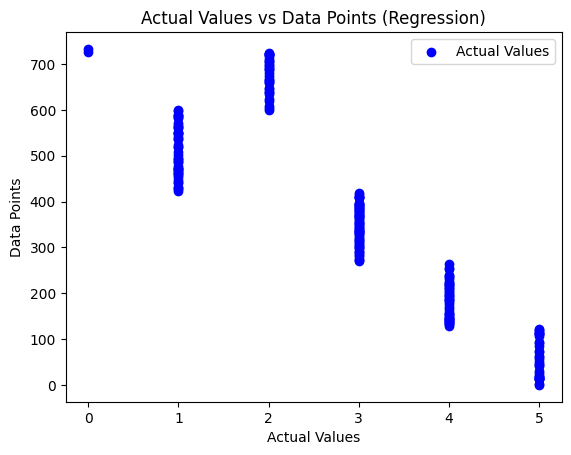

In [ ]:
# Plot the predicted values as dots with reversed axes
plt.scatter(y_pred, y_test.index, c='b', marker='o', label='Predicted Values')
plt.xlabel("Predicted Values")
plt.ylabel("Data Points")
plt.title("Predicted Values vs Data Points (Regression)")
plt.legend()
plt.show()

# Plot the actual values as dots
plt.scatter(y_test, y_test.index, c='b', marker='o', label='Actual Values')
plt.xlabel("Actual Values")
plt.ylabel("Data Points")
plt.title("Actual Values vs Data Points (Regression)")
plt.legend()
plt.show()

In [ ]:
#Creates and prints a correlation matrix
correlationMatrix = df.corr()
print(correlationMatrix)

                                                    record  \
record                                            1.000000   
Bullied_on_school_property_in_past_12_months      0.190890   
Bullied_not_on_school_property_in_past_12_months  0.306010   
Cyber_bullied_in_past_12_months                  -0.047281   
Custom_Age                                        0.112387   
Sex                                              -0.047646   
Physically_attacked                               0.074927   
Physical_fighting                                -0.046085   
Felt_lonely                                      -0.228807   
Close_friends                                    -0.041514   
Miss_school_no_permission                         0.028672   
Other_students_kind_and_helpful                  -0.057535   
Parents_understand_problems                       0.044264   
Most_of_the_time_or_always_felt_lonely            0.297604   
Missed_classes_or_school_without_permission       0.034811   
anxiety_

In [ ]:
# Set new target for finding depression levels
target = df['depression']
predictors = df[['anxiety_level','stress_level','Bullied_not_on_school_property_in_past_12_months','anxiety_level','Most_of_the_time_or_always_felt_lonely']]

In [ ]:
#Import Linier regression model, fits it to the training data.
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [ ]:
#Put test target and then predicts the target variable for the test set
y_pred = lr.predict(X_test)
_preds_df = pd.DataFrame(dict(observed=y_test, predicted=y_pred))
_preds_df.head()

,observed,predicted
385,3,3.213819
464,1,1.162973
335,3,2.999593
331,3,2.839675
333,3,2.960369


In [ ]:
#Prints the Measured Square Erorr and root mean squared error
from sklearn.metrics import mean_squared_error, r2_score
print("R2 Score:", r2_score(y_test, y_pred))
print('MSE: {}'.format(mean_squared_error(y_test, y_pred)))
print('RMSE: {}'.format(mean_squared_error(y_test, y_pred,squared=False)))

R2 Score: 0.9720693239772442
MSE: 0.05140969511509304
RMSE: 0.22673706162666268


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from joblib import Parallel, delayed
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
# Create a dictionary of regression models
regressors = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "Lasso Regression": Lasso(),
    "KNeighbors Regressor": KNeighborsRegressor(),
    "Decision Tree Regressor": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
}

#SUBDIVIDER Test to see different models accuracy

In [ ]:
# Set new target for finding depression levels
target = df['bullying']
predictors = df[['Bullied_on_school_property_in_past_12_months','Bullied_not_on_school_property_in_past_12_months','Felt_lonely','Most_of_the_time_or_always_felt_lonely']]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(predictors, target,
test_size=0.3, random_state=40)

In [ ]:
for name, regressor in regressors.items():
    model = regressor.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Print the evaluation metrics for each regressor
    print(f"\n{name} Regressor:")
    print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
    print("R2 Score:", r2_score(y_test, y_pred))


Linear Regression Regressor:
Mean Squared Error: 0.05140969511509304
R2 Score: 0.9720693239772442

Ridge Regression Regressor:
Mean Squared Error: 0.051606928138759736
R2 Score: 0.9719621680862651

Lasso Regression Regressor:
Mean Squared Error: 0.38191970275940074
R2 Score: 0.7925045954736993

KNeighbors Regressor Regressor:
Mean Squared Error: 0.06360360360360362
R2 Score: 0.9654444236217521

Decision Tree Regressor Regressor:
Mean Squared Error: 0.027308558558558557
R2 Score: 0.9851633723942544

Random Forest Regressor Regressor:
Mean Squared Error: 0.016602957725299
R2 Score: 0.9909796813187345
